# Project Problem

The sales department of a company that sells electronic goods has one year sales information. They want to do an analysis of the data to obtain information as a supporting material for decision making in their business. Because now the assumption is the end of the year. The company wants to provide a strategy to increase sales and customers. However, the company does not yet have a special strategy in the future. As data analyst, we are needed to process sales data in order to provide knowledge to the sales department and help answer the questions raised by them including:
1. What was the best month for sales? How much was earned that month?
2. What city had the highest number of sales?
3. How Are Sales Trends in The Top 5 Cities?
4. What time should we display adversedisement to maximize the likelihood of customer's buying product?
5. What products are most often sold together?
6. What Product Sold the Most? Why do you think it sold the most?

# Project Goal

The purpose of this project is to answer the questions that have been described in business problems. In this project we will:
1. Import data and combine it in one dataframe
2. Data Profile: Search for information about data shape, data type, data characteristics, missing value data, unique data values, and find data duplication.
3. Data Cleansing: Handling missing value, deleting duplicate data, changing data types, and changing data formats.
4. Exploring data using data manipulation and data visualization

This project consists of three parts:
1. Prepare Data
    - Data import
    - Data Profiling
    - DataCleansing
2. Explore (Analyzing Data)
3. Conclusion

# Data Description

1. Order ID - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
2. Product - The product that have been sold.
3. Quantity Ordered - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
4. Price Each - The price of each products.
5. Order Date - This is the date the customer is requesting the order be shipped.
6. Purchase Address - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

# Prepare Data

## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from collections import Counter
sns.set()

In [2]:
# import data to separate dataframe
df1 = pd.read_csv("Sales_January_2019.csv")
df2 = pd.read_csv("Sales_February_2019.csv")
df3 = pd.read_csv("Sales_March_2019.csv")
df4 = pd.read_csv("Sales_April_2019.csv")
df5 = pd.read_csv("Sales_May_2019.csv")
df6 = pd.read_csv("Sales_June_2019.csv")
df7 = pd.read_csv("Sales_July_2019.csv")
df8 = pd.read_csv("Sales_August_2019.csv")
df9 = pd.read_csv("Sales_September_2019.csv")
df10 = pd.read_csv("Sales_October_2019.csv")
df11 = pd.read_csv("Sales_November_2019.csv")
df12 = pd.read_csv("Sales_December_2019.csv")

# concatenate dataframe
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

## Data Profiling

In this section, we will try to find information about the data types used, look at the datasets for inconsistent data formats, and identify the most frequent values.

### Check data shape

In [3]:
# check number of rows and columns
print(f"Total rows and columns dataset: {df.shape[0]} rows and {df.shape[1]} columns")

# check top 5 dataset
print('-'*60)
print("Top 5 dataset: ")
df.head()

Total rows and columns dataset: 186850 rows and 6 columns
------------------------------------------------------------
Top 5 dataset: 


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [5]:
# check count, unique value, top frequency, and frequency
df[["Product", "Price Each", "Quantity Ordered"]].describe()

,Product,Price Each,Quantity Ordered
count,186305,186305,186305
unique,20,24,10
top,USB-C Charging Cable,11.95,1
freq,21903,21903,168552


In [6]:
# check missing value
print("Number of missing value:")
print("-"*30)
df.isnull().sum()

Number of missing value:
------------------------------


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# check distinct value
print("Number of distinct value: ")
print("-"*30)
df.nunique()

Number of distinct value: 
------------------------------


Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [8]:
# check for duplicate data
print("Number of duplicate data:")
print("-"*30)
df.duplicated().sum()

Number of duplicate data:
------------------------------


1162

From the profiling data above, we can see data information that:
1. The size of this data is 186850 rows and 6 columns
2. The data type is incorrect. Some numeric data has an object data type. This will interfere with the data analysis process later
3. The data format is less usable. Order date and Purchase Address are too messy to clean up first
4. There are missing values in all columns.
5. There are duplicate data

## Data Cleansing

In this section, we will clean up the data based on the findings at the data profiling stage. We'll start by dealing with missing values and duplicate data

### Removing missing value and duplicate data

In [9]:
# removing missing value
df = df.dropna(how="all")

# removing duplicate data
df = df.drop_duplicates()

# check
print("Number of missing value: ")
print(df.isnull().sum())
print("\nNumber of duplicate data: ", df.duplicated().sum())

Number of missing value: 
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Number of duplicate data:  0


### Change the data type

In [10]:
df = df[df['Order Date'].str[0:2]!='Or']

In [11]:
# Change the data type
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Order Date"] = pd.to_datetime(df["Order Date"])

### Changing data formats

In [12]:
# create city column from pruchase address
df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1])

In [13]:
# create a month and our column from purchase date
df["Month"] = df["Order Date"].dt.month
df["Hour"] = df["Order Date"].dt.hour

In [14]:
# create total sales column 
df["Total Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [15]:
# drop column order date and purchase address
df.drop(columns=["Order Date", "Purchase Address"], inplace=True)

In [16]:
# check dataset
df.head()

,Order ID,Product,Quantity Ordered,Price Each,City,Month,Hour,Total Sales
0,141234,iPhone,1,700.00,Boston,1,21,700.00
1,141235,Lightning Charging Cable,1,14.95,Portland,1,14,14.95
2,141236,Wired Headphones,2,11.99,San Francisco,1,13,23.98
3,141237,27in FHD Monitor,1,149.99,Los Angeles,1,20,149.99
4,141238,Wired Headphones,1,11.99,Austin,1,11,11.99


Text(0.5, 1.0, 'Feature Correlation')

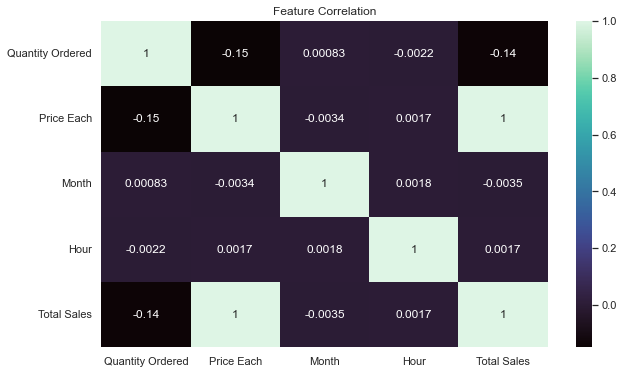

In [17]:
# check for data correlation
plt.figure(figsize=(10,6))
corr = df.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap="mako")
plt.title("Feature Correlation")

Data looks cleaner now. We've done some handling to deal with messy data. Next, we will explore to answer business problems

# Explore

### Question 1: What was the best month for sales? How much was earned that month?

In [18]:
df_month = pd.DataFrame(df.groupby("Month")['Total Sales'].sum()).reset_index()

In [19]:
df_month

,Month,Total Sales
0,1,1821413.16
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


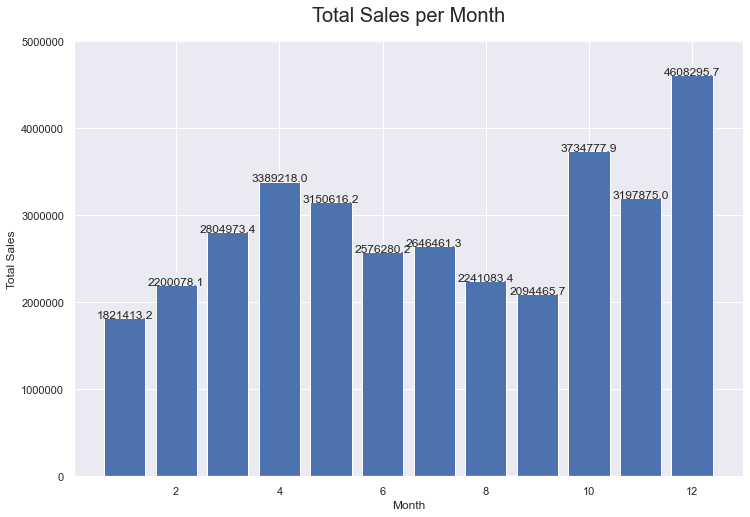

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

bars = ax.bar(
    x = df_month['Month'],
    height = df_month["Total Sales"]
)
plt.title("Total Sales per Month", pad=20, fontsize=20)
plt.xlabel("Month")
plt.ylabel("Total Sales")
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1).astype(int))

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.8,
      round(bar.get_height(), 1),
      horizontalalignment='center'
  )

plt.show()

From the bar chart above, the most sales occurred in December. While the lowest is in January. We can see the trend of data starting from April decreased until September. We can relate this downward trend to what events occurred during these months. The highest earnings in december reached $ 4608295.70

### Question 2: What City had the highest number of sales?

In [21]:
df_city = pd.DataFrame(df.groupby("City")["Total Sales"].sum()).reset_index().sort_values(by='Total Sales', ascending=False)

In [22]:
df_city

,City,Total Sales
7,San Francisco,8254743.55
4,Los Angeles,5448304.28
5,New York City,4661867.14
2,Boston,3658627.65
0,Atlanta,2794199.07
3,Dallas,2765373.96
8,Seattle,2745046.02
6,Portland,2319331.94
1,Austin,1818044.33


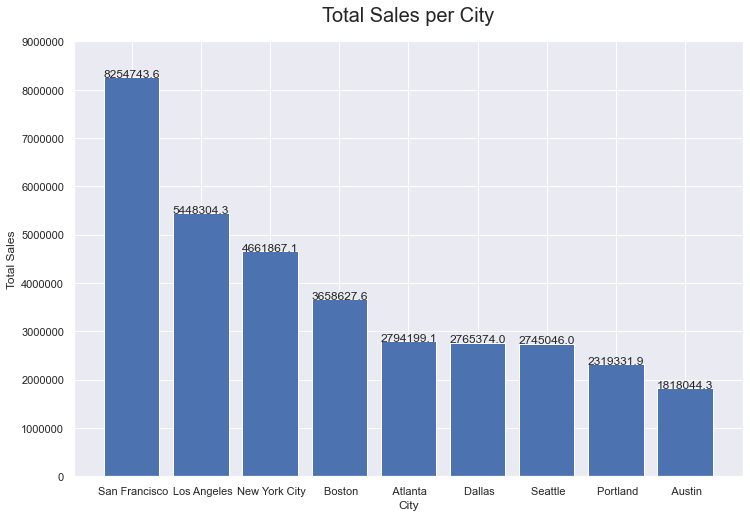

In [23]:
fig, ax = plt.subplots(figsize=(12,8))

bars = ax.bar(
    x = df_city['City'],
    height = df_city["Total Sales"]
)
plt.title("Total Sales per City", pad=20, fontsize=20)
plt.xlabel("City")
plt.ylabel("Total Sales")
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1).astype(int))

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.8,
      round(bar.get_height(), 1),
      horizontalalignment='center'
  )

plt.show()

San Francisco is the city that has the highest total sales with 8,254,743. Followed by the cities of Los Angeles and New York City. The lowest city is Austin with a total of 1,818,044

### Question 3: How are sales trends in the top 5 cities?

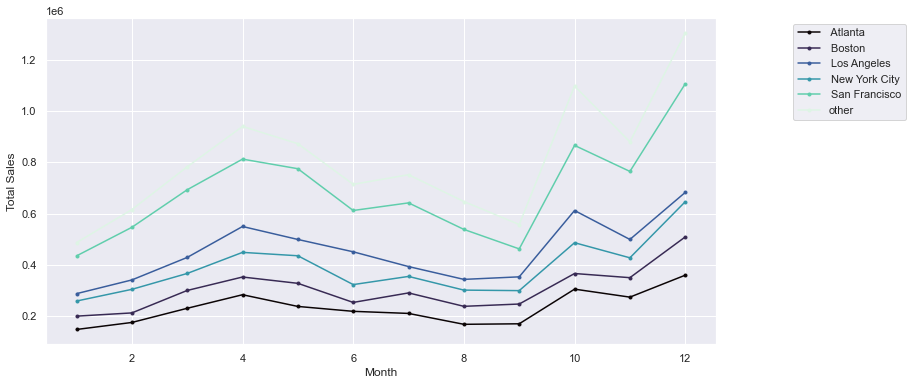

In [24]:
# create variable top city
top_city = (
    df.groupby("City")["Total Sales"]
    .sum()
    .reset_index()
    .sort_values(by="Total Sales", ascending=False)
    .head()
)

# create column top_city
df["Top City"] = df["City"].apply(lambda x: x if(x in top_city["City"].to_list())else 'other')

# plot multiline chart
df.groupby(['Month', 'Top City'])['Total Sales'].sum().unstack().plot(marker='.', cmap="mako")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))
plt.gcf().set_size_inches(12,6)
plt.show()


The trend above is almost similar to the bar chart of total sales by month in question 1. There was a decrease from April to September.

### Question 4: What time should we display adverstisement to maximize likelihood of customer's buying product?

In [25]:
df_hour = df.groupby("Hour").count()
df_hour

,Order ID,Product,Quantity Ordered,Price Each,City,Month,Total Sales,Top City
Hour,,,,,,,,
0,3902,3902,3902,3902,3902,3902,3902,3902
1,2347,2347,2347,2347,2347,2347,2347,2347
2,1242,1242,1242,1242,1242,1242,1242,1242
3,830,830,830,830,830,830,830,830
4,852,852,852,852,852,852,852,852
5,1320,1320,1320,1320,1320,1320,1320,1320
6,2481,2481,2481,2481,2481,2481,2481,2481
7,4002,4002,4002,4002,4002,4002,4002,4002
8,6252,6252,6252,6252,6252,6252,6252,6252


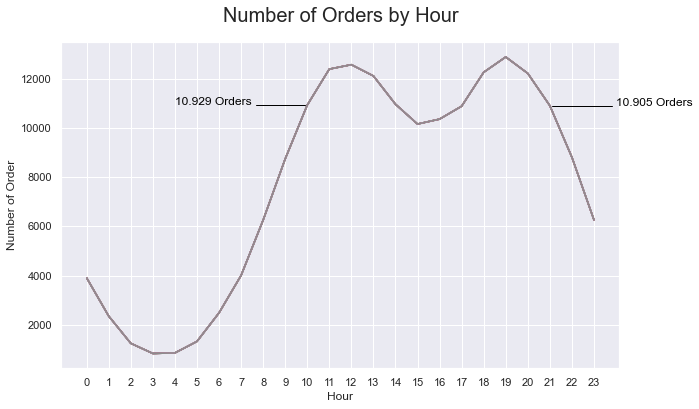

In [26]:
plt.figure(figsize=(10,6))
plt.plot(df.groupby("Hour").count())
plt.title("Number of Orders by Hour", pad=20, fontsize=20)
plt.ylabel("Number of Order")
plt.xlabel("Hour")
plt.xticks(range(0,24))

plt.annotate("10.929 Orders", xy=(10, 10929),
            xytext=(4, 10929), color='black',
             arrowprops=dict(arrowstyle='-',
                            connectionstyle="angle",
                            color="black")
            )

plt.annotate("10.905 Orders", xy=(21, 10905),
            xytext=(24, 10905), color='black',
             arrowprops=dict(arrowstyle='-',
                            connectionstyle="angle",
                            color="black")
            )

plt.show()

From the line chart it can be seen that the quantity of orders is greater in the range of 10.00 am to 21.00 pm. At 10.00 am sales orders started to increase with the amount of 10,929. then experienced increases and decreases which were not too significant and ended at 21.00 pm with a total order of 10,905. In this hour range the number of installations is more than other hours. And the time span of these hours is also the time when people will be active for activities or shopping. So, the right time to do advertising is in the range of 10.00 am to 21.00 pm

### Question 5: What products are most often sold together?

In [27]:
df_product = df[df['Order ID'].duplicated(keep=False)]

df_product['Grouped'] = df_product.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_product_sold = df_product[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()

for row in df_product_sold['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\HP\AppData\Local\Temp/ipykernel_12820/2148493857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['Grouped'] = df_product.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


We can see the highest that the Iphone is more often sold together with the Lightning Charge Cable. The second is a Google Phone with a USB-C Charging Cable. The pattern shows that when a customer buys a cellphone, it is likely that he will also buy cellphone accessories at the same time

### Question 6: What product sold the most? Why do you think it sold the most?

In [28]:
df_product = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

In [29]:
df_product

,Product,Quantity Ordered
0,20in Monitor,4126
1,27in 4K Gaming Monitor,6239
2,27in FHD Monitor,7541
3,34in Ultrawide Monitor,6192
4,AA Batteries (4-pack),27615
5,AAA Batteries (4-pack),30986
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
8,Flatscreen TV,4813
9,Google Phone,5529


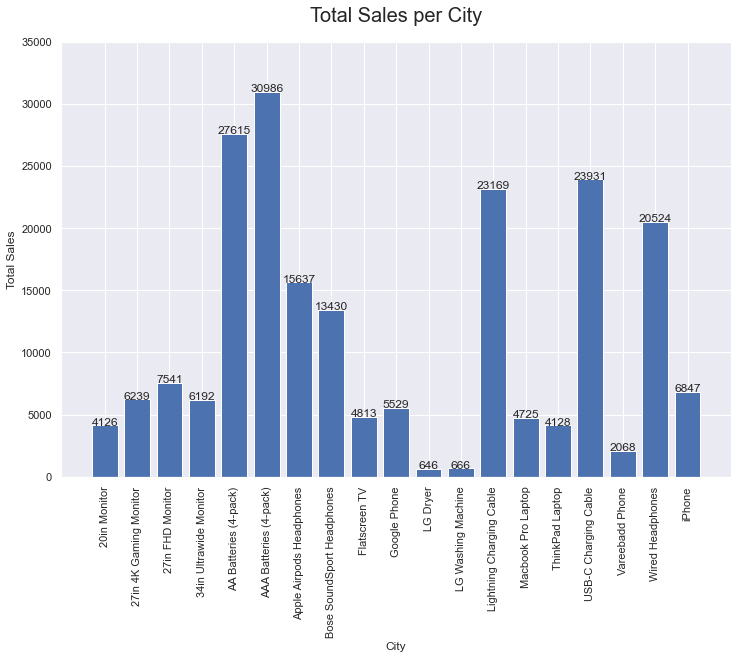

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

bars = ax.bar(
    x = df_product['Product'],
    height = df_product["Quantity Ordered"]
)
plt.title("Total Sales per City", pad=20, fontsize=20)
plt.xlabel("City")
plt.ylabel("Total Sales")
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1).astype(int))
plt.xticks(rotation="vertical")

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.8,
      round(bar.get_height(), 1),
      horizontalalignment='center'
  )

plt.show()

AAA Batteries (4-packs) were the most sold products with 30986 followed by AA Batteries (4-packs) and USB-C charging cables. Meanwhile, the product that sold the least was the LG Dryer with 646 followed by the LG Washing Machine with 666.

# Conclusion

Some of the findings after analyzing the data above are as follows:
1. The most sales occurred in December. While the lowest is in January. The highest earnings in december reached $ 4608295.70
2. San Francisco is the city that has the highest total sales with 8,254,743. The lowest city is Austin with a total of 1,818,044
3. There was a decrease from April to September.
4. Thee right time to do advertising is in the range of 10.00 am to 21.00 pm
5. Iphone is more often sold together with the Lightning Charge Cable.
6. AAA Batteries (4-packs) were the most sold products with 30986, While the least sold products were LG Dryer with 646.

We can advise company managers to:
1. Finding out what happened in April-September, because in the middle of the year sales decreased compared to other months. Maybe it could be caused by external and internal conditions of the company. External conditions such as certain events, pandemics, financial crises, etc. Meanwhile, internal conditions may include stock of goods, quality of goods, loss/theft of goods, marketing activities, etc. Thus, the company can anticipate that the following year will not experience a decline.
2. Responding to the lowest sales in several cities, companies can carry out promotional strategies such as free shipping or adding cheaper shipping options.
3. Seeing that sales of mobile phones with accessories are more often sold simultaneously. Companies can carry out marketing strategies by providing special prices for purchasing cellphones and their accessories directly. This step can attract customers.
4. For the fewest items sold, the company can carry out markeitng strategy such as flash sales, discounts, price reductions, or other marketing strategies.